# INTRODUCTION

#### This dataset originates from Kaggle, and I have personally conducted a comprehensive analysis and visualization of its contents. During the process, I utilized ChatGPT for sections where certain coding complexities exceeded my expertise.

#### Data Source: - https://www.kaggle.com/datasets/guillemservera/tsla-stock-data

# BLUEPRINT


## Load and Prepare Data
- Load dataset into DataFrame
- Remove rows with missing values
- Define features (X) and target (y)
- Apply feature scaling
- Split data into training and testing sets

## Train Linear Regression Model
- Initialize Linear Regression model
- Train the model on the training data

## Evaluate Model Performance
- Make predictions on testing data
- Calculate Mean Squared Error (MSE)

## Predict on New Data
- Prompt user for new data input
- Create DataFrame with user-input values
- Scale and preprocess new data
- Use trained model to predict target value for new data


In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'C:\Users\Anonymous\Documents\Datasets\Tesla Stock\tsla_split_adjusted.csv')

In [4]:
df

,date,open,high,low,close,volume,raw_close,change_percent,avg_vol_20d
0,2010-06-29,1.26666,1.66666,1.16934,1.59266,281749173,23.8899,NaN,NaN
1,2010-06-30,1.71934,2.02794,1.55334,1.58866,257915884,23.8299,-0.25,NaN
2,2010-07-01,1.66666,1.72800,1.35134,1.46400,123447940,21.9600,-7.85,NaN
3,2010-07-02,1.53334,1.54000,1.24734,1.28000,77127102,19.2000,-12.57,NaN
4,2010-07-06,1.33334,1.33334,1.05534,1.07400,103189435,16.1100,-16.09,NaN
...,...,...,...,...,...,...,...,...,...
3302,2023-08-11,241.77000,243.79000,238.02000,242.65000,99038641,242.6500,-1.10,1.134650e+08
3303,2023-08-14,235.70000,240.66000,233.75000,239.76000,98595328,239.7600,-1.19,1.118163e+08
3304,2023-08-15,238.73000,240.50000,232.61000,232.96000,88197602,232.9600,-2.84,1.106044e+08
3305,2023-08-16,228.02000,233.97000,225.38000,225.60000,112484492,225.6000,-3.16,1.091109e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3307 non-null   object 
 1   open            3307 non-null   float64
 2   high            3307 non-null   float64
 3   low             3307 non-null   float64
 4   close           3307 non-null   float64
 5   volume          3307 non-null   int64  
 6   raw_close       3307 non-null   float64
 7   change_percent  3306 non-null   float64
 8   avg_vol_20d     3288 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 232.6+ KB


In [6]:
df.isnull().mean()*100

date              0.000000
open              0.000000
high              0.000000
low               0.000000
close             0.000000
volume            0.000000
raw_close         0.000000
change_percent    0.030239
avg_vol_20d       0.574539
dtype: float64

In [7]:
df

,date,open,high,low,close,volume,raw_close,change_percent,avg_vol_20d
0,2010-06-29,1.26666,1.66666,1.16934,1.59266,281749173,23.8899,NaN,NaN
1,2010-06-30,1.71934,2.02794,1.55334,1.58866,257915884,23.8299,-0.25,NaN
2,2010-07-01,1.66666,1.72800,1.35134,1.46400,123447940,21.9600,-7.85,NaN
3,2010-07-02,1.53334,1.54000,1.24734,1.28000,77127102,19.2000,-12.57,NaN
4,2010-07-06,1.33334,1.33334,1.05534,1.07400,103189435,16.1100,-16.09,NaN
...,...,...,...,...,...,...,...,...,...
3302,2023-08-11,241.77000,243.79000,238.02000,242.65000,99038641,242.6500,-1.10,1.134650e+08
3303,2023-08-14,235.70000,240.66000,233.75000,239.76000,98595328,239.7600,-1.19,1.118163e+08
3304,2023-08-15,238.73000,240.50000,232.61000,232.96000,88197602,232.9600,-2.84,1.106044e+08
3305,2023-08-16,228.02000,233.97000,225.38000,225.60000,112484492,225.6000,-3.16,1.091109e+08


In [8]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'raw_close',
       'change_percent', 'avg_vol_20d'],
      dtype='object')

<AxesSubplot:xlabel='date'>

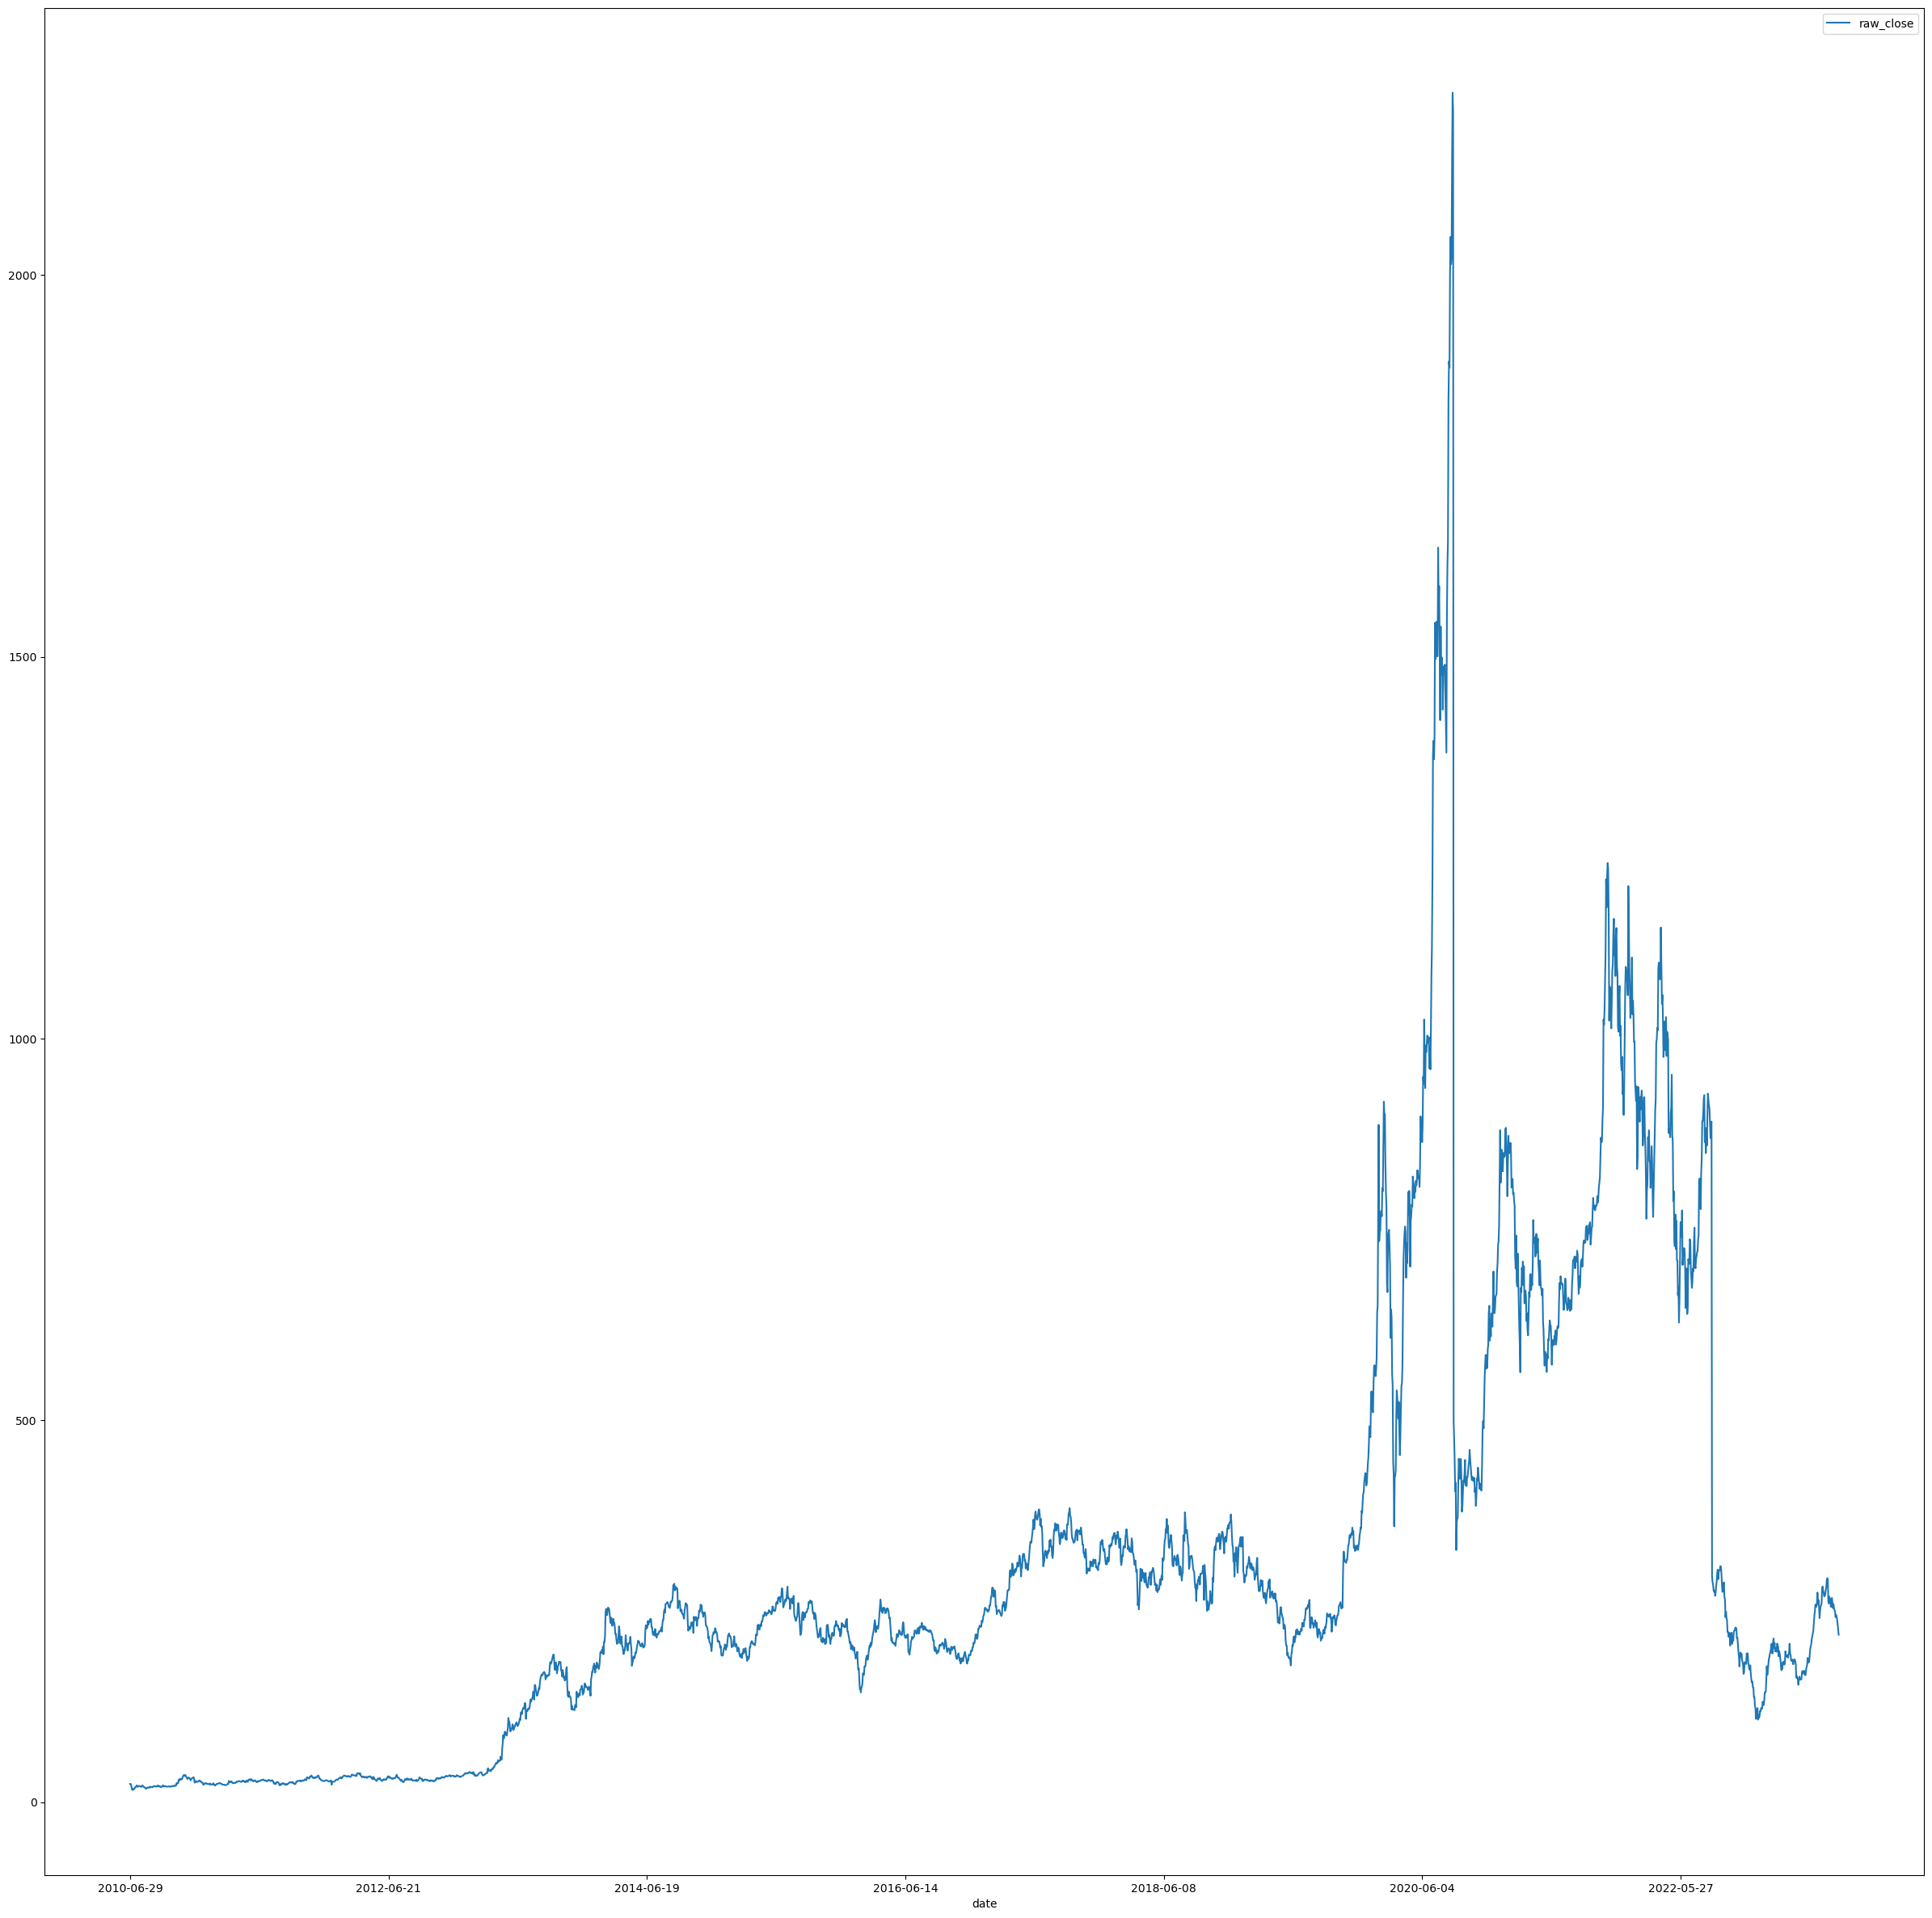

In [9]:
df.plot(kind='line',x='date', y='raw_close', figsize=(30,30))

# Predictive Modeling Using Sci-Kit Learn

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### import pandas as pd:
This line imports the pandas library and assigns it an alias "pd". Pandas is a popular Python library used for data manipulation and analysis. It provides data structures and functions to efficiently handle structured data, such as CSV files, Excel spreadsheets, SQL databases, and more. By using the alias "pd", you can access pandas functions and classes more conveniently throughout your code.

### from sklearn.preprocessing import StandardScaler:
This line imports the StandardScaler class from the scikit-learn (sklearn) library's preprocessing module. The StandardScaler is a preprocessing technique commonly used in machine learning to standardize features by removing the mean and scaling to unit variance. Standardizing features ensures that each feature has a mean of 0 and a standard deviation of 1, which can be important for certain machine learning algorithms that are sensitive to feature scales.

### from sklearn.linear_model import LinearRegression:
This line imports the LinearRegression class from the scikit-learn library's linear_model module. The LinearRegression class is used for implementing linear regression models. Linear regression is a basic machine learning algorithm that models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data points. It's commonly used for tasks like predicting numerical values based on input features.

In [11]:
df_filled = df.fillna(df.mean())

df is a DataFrame that likely contains some missing values (NaNs).\
fillna(df.mean()) is a pandas method that fills missing values in a DataFrame with the mean value of each column.

In [12]:
features = ['open', 'high', 'low', 'volume', 'raw_close', 'change_percent', 'avg_vol_20d']
target = 'close'

In this line, a list called features is created. Each element in this list corresponds to a column name in your dataset. These columns are considered as input features for your predictive model. For example, 'open', 'high', 'low', etc. seem to represent different attributes or measurements that you want to use to predict the target variable.\
Here, the variable target is assigned the string value 'close'. This implies that the 'close' column in your dataset is the target variable you want to predict. The 'close' column likely contains the values you want your model to predict based on the values of the input features defined in the features list.

In [13]:
X = df_filled[features]
y = df_filled[target]

The code is preparing the data for a predictive modeling task by separating the features (input variables) and the target variable (output variable) from the DataFrame df_filled.\

X represents the features, which are a subset of the columns from the df_filled DataFrame. It's created by selecting only the columns listed in the features list. This is a common practice to isolate the input variables that will be used to make predictions.\

y represents the target variable, which is a single column from the df_filled DataFrame. It's created by selecting the column specified by the target variable. This is the variable that the predictive model will aim to predict.

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

You are applying feature scaling to the feature matrix X using the StandardScaler from the sklearn.preprocessing module. Feature scaling is a preprocessing technique used to standardize the range of independent variables (features) in your dataset. This is important because many machine learning algorithms perform better when features are on a similar scale.\

Here's what each line of the code does:\

scaler = StandardScaler(): You create an instance of the StandardScaler class. This scaler will be used to transform your features into a standardized scale.\

X_scaled = scaler.fit_transform(X): You apply the scaling transformation to your feature matrix X. The fit_transform method of the StandardScaler calculates the mean and standard deviation of each feature in X and then scales the features such that they have a mean of 0 and a standard deviation of 1. The scaled features are stored in the X_scaled array.

In [15]:
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

model = LinearRegression(): This creates an instance of the LinearRegression class, which represents a linear regression model. Linear regression is a common machine learning algorithm used for predicting a continuous target variable based on one or more input features.\

model.fit(X_scaled, y): This line trains the linear regression model using the scaled features X_scaled and the target variable y. The fit method computes the coefficients of the linear regression equation that best fits the relationship between the features and the target variable. After fitting, the model is ready to make predictions.



In [16]:
new_open_value = float(input("Enter Open value: "))
new_high_value = float(input("Enter High value: "))
new_low_value = float(input("Enter Low value: "))
new_volume_value = float(input("Enter Volume value: "))
new_raw_close_value = float(input("Enter Raw Close value: "))
new_change_percent_value = float(input("Enter Change Percent value: "))
new_avg_vol_20d_value = float(input("Enter Average Volume 20 Days value: "))

new_data = pd.DataFrame({
    'open': [new_open_value],
    'high': [new_high_value],
    'low': [new_low_value],
    'volume': [new_volume_value],
    'raw_close': [new_raw_close_value],
    'change_percent': [new_change_percent_value],
    'avg_vol_20d': [new_avg_vol_20d_value]
})

new_data_scaled = scaler.transform(new_data[features])

predicted_price = model.predict(new_data_scaled)

print("Predicted Price:", predicted_price)


Enter Open value: 226
Enter High value: 226
Enter Low value: 218
Enter Volume value: 1.063889e+08
Enter Raw Close value: 219
Enter Change Percent value: -2.83
Enter Average Volume 20 Days value: 120718417
Predicted Price: [220.34435996]


### User Input:

The code prompts the user to input values for various features like open, high, low, volume, raw_close, change_percent, and avg_vol_20d.
Create DataFrame for New Data:

A new DataFrame called new_data is created using the user-input values. Each feature is assigned a corresponding user-input value.
### Scale New Data:

The same scaler that was used to scale the training data is applied to the new data. The new data is transformed using the scaler to ensure it's on the same scale as the training data.
### Predict using Trained Model:

The trained linear regression model (model) is used to predict the target variable for the new data. The predict method is applied to the scaled new data to generate predictions.
### Print Predicted Price:

The predicted price is printed to the console.

## Model Accuracy using r2 Value

In [32]:
r2 = r2_score(y, model.predict(X_scaled))
print("R^2 Score:", r2)

R^2 Score: 0.9996513370001151


In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mse = mean_squared_error(y, model.predict(X_scaled))
rounded_mse = round(mse, 2)
print("Mean Squared Error:", rounded_mse)

Mean Squared Error: 3.39


--------------------------------------------------------------------------------------------------------------------------------